In [1]:
import numpy as np
import pandas as pd
import glob
from skimage.io import imread
from skimage import io
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
directory = "/content/drive/MyDrive/00 CSE428 Lab Project/Group_3/"
os.chdir(directory)
!ls

Mounted at /content/drive
test  test.csv	train  train.csv


In [4]:
df_test = pd.read_csv('test.csv')

In [5]:
df_train = pd.read_csv('train.csv')

In [6]:
X_train = df_train.drop(['label'], axis=1)
y_train = df_train["label"]

In [7]:
X_test = df_test.drop(['label'], axis=1)
y_test = df_test["label"]

In [8]:
print("shape of X =", X_train.shape)
print("shape of y =", y_train.shape)

shape of X = (2150, 12288)
shape of y = (2150,)


In [9]:
print("shape of X =", X_test.shape)
print("shape of y =", y_test.shape)

shape of X = (250, 12288)
shape of y = (250,)


In [10]:
#scaling train

X_train_norm = preprocessing.minmax_scale(X_train)
df_train = pd.DataFrame(X_train_norm, columns=df_train.columns[:-1])
df_train.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,0.635294,0.666667,0.717647,0.639216,0.670588,0.721569,0.643137,0.674510,0.717647,0.654902,...,0.066667,0.141176,0.145098,0.121569,0.160784,0.164706,0.141176,0.086275,0.090196,0.066667
1,0.262745,0.564706,0.839216,0.262745,0.564706,0.847059,0.266667,0.568627,0.850980,0.274510,...,0.368627,0.560784,0.494118,0.376471,0.572549,0.498039,0.372549,0.560784,0.486275,0.356863
2,0.949020,0.929412,0.952941,0.952941,0.925490,0.952941,0.952941,0.929412,0.945098,0.956863,...,0.905882,0.894118,0.894118,0.901961,0.894118,0.894118,0.901961,0.894118,0.894118,0.901961
3,0.541176,0.725490,0.890196,0.537255,0.721569,0.886275,0.533333,0.705882,0.882353,0.517647,...,0.556863,0.458824,0.541176,0.545098,0.466667,0.549020,0.552941,0.486275,0.568627,0.572549
4,0.239216,0.419608,0.611765,0.239216,0.419608,0.611765,0.243137,0.423529,0.615686,0.243137,...,0.800000,0.643137,0.764706,0.835294,0.670588,0.796078,0.854902,0.635294,0.760784,0.819608


In [11]:
#scaling test

X_test_norm = preprocessing.minmax_scale(X_test)
df_test = pd.DataFrame(X_test_norm, columns=df_test.columns[:-1])
df_test.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,0.929412,0.933333,0.949020,0.929412,0.933333,0.949020,0.929412,0.933333,0.949020,0.933333,...,0.949020,0.850980,0.917647,0.956863,0.850980,0.921569,0.968627,0.850980,0.921569,0.968627
1,0.321569,0.509804,0.701961,0.325490,0.509804,0.690196,0.341176,0.501961,0.674510,0.352941,...,0.682353,0.349020,0.509804,0.682353,0.349020,0.509804,0.682353,0.349020,0.509804,0.682353
2,0.117647,0.121569,0.000000,0.145098,0.156863,0.035294,0.054902,0.066667,0.000000,0.121569,...,0.333333,0.282353,0.282353,0.274510,0.368627,0.368627,0.368627,0.337255,0.337255,0.337255
3,0.686275,0.678431,0.698039,0.737255,0.729412,0.749020,0.815686,0.807843,0.827451,0.831373,...,0.082353,0.207843,0.301961,0.074510,0.223529,0.317647,0.090196,0.239216,0.337255,0.109804
4,0.023529,0.047059,0.133333,0.000000,0.000000,0.117647,0.843137,0.862745,0.949020,0.000000,...,0.486275,0.541176,0.411765,0.447059,0.450980,0.423529,0.400000,0.380392,0.423529,0.368627


In [12]:
# Flatten the inputs
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], -1)

In [13]:

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [14]:
number_of_classes = 5
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

In [15]:
model = Sequential()
model.add( Input(shape = (12288,)) )
model.add( Dense(128, activation='sigmoid') ) #hidden layer
model.add( Dense(64, activation='sigmoid') ) #hidden layer
model.add( Dense(32, activation='sigmoid') ) #hidden layer
model.add( Dense(number_of_classes, activation='softmax') ) #output layer, activation must be softmax

In [16]:
# Compile the model
model.compile(optimizer='sgd', # 'adam'
              loss='categorical_crossentropy',
              metrics=['accuracy'])

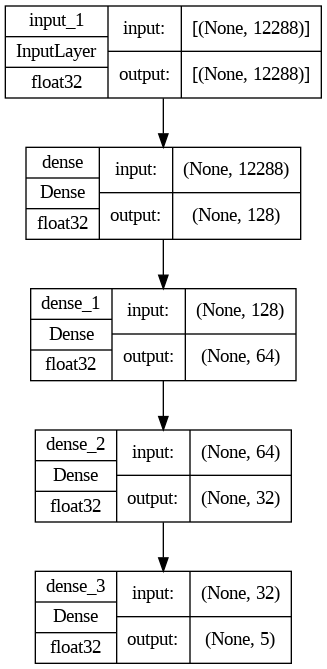

In [17]:
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [18]:
model.fit(X_train_norm, y_train, epochs=70, verbose=1)

Epoch 1/70
68/68 [==============================] - 1s 10ms/step - loss: 1.6130 - accuracy: 0.2326
Epoch 2/70
68/68 [==============================] - 1s 9ms/step - loss: 1.5799 - accuracy: 0.2377
Epoch 3/70
68/68 [==============================] - 1s 9ms/step - loss: 1.5758 - accuracy: 0.2693
Epoch 4/70
68/68 [==============================] - 1s 9ms/step - loss: 1.5727 - accuracy: 0.3572
Epoch 5/70
68/68 [==============================] - 1s 10ms/step - loss: 1.5687 - accuracy: 0.3158
Epoch 6/70
68/68 [==============================] - 1s 9ms/step - loss: 1.5650 - accuracy: 0.3781
Epoch 7/70
68/68 [==============================] - 1s 9ms/step - loss: 1.5614 - accuracy: 0.4047
Epoch 8/70
68/68 [==============================] - 1s 9ms/step - loss: 1.5575 - accuracy: 0.3749
Epoch 9/70
68/68 [==============================] - 1s 9ms/step - loss: 1.5536 - accuracy: 0.4195
Epoch 10/70
68/68 [==============================] - 1s 9ms/step - loss: 1.5495 - accuracy: 0.3837
Epoch 11/70
68/68

In [19]:
y_pred = model.predict(X_test_norm)

8/8 [==============================] - 0s 5ms/step


In [20]:
y_predicted = np.argmax(y_pred, axis=1)

In [21]:
y_actual = np.argmax(y_test, axis=1)
print(y_actual)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [22]:
nn_testing = np.mean(y_actual == y_predicted)*100
print("Testing accuracy (%) =", nn_testing)

Testing accuracy (%) = 46.400000000000006


In [23]:
# loss_test, pred_test = model.evaluate(X_test_norm, y_test)
test_loss, test_acc = model.evaluate(X_test_norm, y_test)
print("Testing accuracy (%) =", test_acc)

8/8 [==============================] - 0s 5ms/step - loss: 1.2009 - accuracy: 0.4640
Testing accuracy (%) = 0.46399998664855957


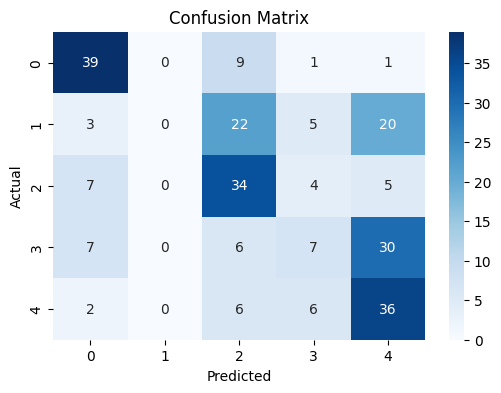

In [24]:
cm = confusion_matrix(y_actual,y_predicted)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
def calc(cnf_matrix):
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    F1 = 2*((PPV)*(TPR)/(PPV + TPR))

    return TPR, TNR, PPV, NPV, F1

TPR, TNR, PPV, NPV, F1 = calc(cm)
print(TPR, TNR, PPV, NPV, F1)

[0.78 0.   0.68 0.14 0.72] [0.905 1.    0.785 0.92  0.72 ] [0.67241379        nan 0.44155844 0.30434783 0.39130435] [0.94270833 0.8        0.90751445 0.81057269 0.91139241] [0.72222222        nan 0.53543307 0.19178082 0.50704225]


In [26]:
from tabulate import tabulate

print("Classification Report:")
table_data = [
    ["Sensitivity", "Specificity", "PPV", "NPV", "F1 Score"],
]

for i in range(len(TPR)):
    table_data.append([round(TPR[i], 2), round(TNR[i], 2), round(PPV[i], 2), round(NPV[i], 2), round(F1[i], 2)])

print(tabulate(table_data, headers="firstrow", tablefmt="pretty",showindex=True))

Classification Report:
+---+-------------+-------------+------+------+----------+
|   | Sensitivity | Specificity | PPV  | NPV  | F1 Score |
+---+-------------+-------------+------+------+----------+
| 0 |    0.78     |     0.9     | 0.67 | 0.94 |   0.72   |
| 1 |     0.0     |     1.0     | nan  | 0.8  |   nan    |
| 2 |    0.68     |    0.78     | 0.44 | 0.91 |   0.54   |
| 3 |    0.14     |    0.92     | 0.3  | 0.81 |   0.19   |
| 4 |    0.72     |    0.72     | 0.39 | 0.91 |   0.51   |
+---+-------------+-------------+------+------+----------+
